<h1 align="center"> ФМИ. Disbalanced dataset.  Part 2 </h1>
<h1 align="center"> Credit card Fraud Detector </h1>


<h2> Введение </h2>

На данном семинаре мы будем реализовывать различные прогностические модели, чтобы проверить, насколько точно они определяют, является ли транзакция обычным платежом (non Fraud) или мошенничеством (Fraud).

<h4> По мотивам кейса, рассмотренного в Зимней школе СберУнивера </h4>

<h2> Наши цели: </h2>
<ul>
<li> Проанализировать полученные данные.</li>
<li> Решить проблему сильного дисбаланса классов.  </li>
<li>Построить модели на основе классических алгоритмов машинного обучения. </li>
<li> Провести сравнительный анализ классических подходов.</li>

## Описание данных и постановка задачи:
**Задача:** см ФМИ. Disbalanced dataset.Part 1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

Подключимся к диску для загрузки данных.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загружаем данные.

In [5]:
# Будем загружать данные, полученные в предыдущем блокноте.
# См обновленный блокнот

new_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_short.csv')
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,141091.0,-0.936454,1.672331,-1.668639,-1.193362,0.560034,-1.329622,0.813360,0.600844,-0.645213,...,0.324693,0.882982,-0.170473,-0.372182,-0.243704,0.106747,0.244041,0.187315,2.00,0
1,55760.0,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,...,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,311.91,1
2,27122.0,1.185267,0.049199,-0.083192,1.018809,0.407574,0.792726,-0.090304,0.239424,0.208645,...,-0.128511,-0.215874,-0.219752,-1.158073,0.763055,-0.256106,0.028607,-0.005864,17.76,0
3,35899.0,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,-5.015491,...,1.080323,-0.561384,0.102678,-0.067195,-0.476931,-0.103716,1.166961,0.663632,1.00,1
4,36170.0,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1


In [6]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88504.468496,-2.369716,1.717936,-3.535222,2.311515,-1.561045,-0.645503,-2.808226,0.327465,-1.289373,...,0.346521,-0.008519,-0.010647,-0.058453,-0.000158,0.031723,0.088895,0.026478,113.984461,0.500000
std,47893.121298,5.566826,3.847276,6.210645,3.179652,4.252080,1.839519,5.838367,4.847866,2.304009,...,2.783926,1.175249,1.418134,0.578591,0.702300,0.493283,1.031564,0.452250,268.442475,0.500254
min,155.000000,-30.552380,-29.700604,-31.103685,-4.007629,-22.105532,-10.819584,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.687773,-4.781606,-1.320263,-7.263482,-4.398798,0.000000,0.000000
25%,47693.750000,-2.800824,-0.255039,-5.113334,-0.101967,-1.800606,-1.573973,-3.078361,-0.188519,-2.270235,...,-0.172184,-0.535251,-0.239328,-0.419160,-0.354275,-0.309498,-0.071980,-0.057457,1.290000,0.000000
50%,81108.000000,-0.779030,0.940617,-1.439955,1.371235,-0.388664,-0.626994,-0.690105,0.193798,-0.696550,...,0.142824,-0.017669,-0.016939,0.007437,0.021480,-0.009283,0.041199,0.032486,17.995000,0.500000
75%,134742.000000,1.026548,2.793742,0.331923,4.263895,0.474788,0.181917,0.213306,0.880371,0.218885,...,0.643793,0.548681,0.200492,0.382076,0.383466,0.330263,0.454884,0.212687,99.990000,1.000000
max,172777.000000,2.373224,22.057729,3.790995,12.114672,15.700555,6.648989,10.022924,20.007208,4.403052,...,27.202839,8.361985,22.083545,1.910581,6.070850,2.745261,6.578849,1.779364,4171.800000,1.000000


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h3 style="text-align: center;">Материалы для изучения scikit-learn:<b></b></h3>

*1) Официальный сайт с подробными описаниями моделей и методов : https://scikit-learn.org/stable/user_guide.html*

*2) Полезный репозиторий с блокнотами: https://github.com/gmonce/scikit-learn-book*

*3) Хороший курс с упражнениями: https://inria.github.io/scikit-learn-mooc/*

In [9]:
'''
Работаем с маленьким датасетом new_df
Делаем из него 2 набора.
В первом - все столбцы, но нет целевой переменной.
Во втором - столбец с целевой переменной.
'''


X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [10]:
# Про масштабирование мы с вами уже в курсе. Опять используем RobustScaler

from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = rob_scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))

X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['scaled_time'] = rob_scaler.fit_transform(X_test['Time'].values.reshape(-1,1))


# удаляем из трейн и тест датасетов  столбцы Time и Amount,
# так как у нас уже есть их отмасштабированные версии
X_train.drop(['Time','Amount'], axis=1, inplace=True)
X_test.drop(['Time','Amount'], axis=1, inplace=True)

In [11]:
# Переводим данные в массив для подачи в классификатор
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [12]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Выберем несколько простых моделей из библиотеки sklearn

classifiers = {
    "Logisitic Regression": LogisticRegression(), # Логистическая регрессия
    "KNearest Classifie": KNeighborsClassifier(), # Метод ближайших соседей
    "Support Vector Classifier": SVC(), # Метод опорных векторов
    "Linear SVC": LinearSVC(), # Линейный метод опорных векторов
    "Decision Tree Classifier": DecisionTreeClassifier(), # Решающее дерево
    "Stochastic Gradient Descent Classifier": SGDClassifier(), # Стохастический градиентный спуск
    "Gaussian Naive Bayes": GaussianNB(), # Гауссовский наивный байес
    "Ridge Classifier": RidgeClassifier(), # Регрессия ядра хребта
}

Для борьбы с переобучением будем использовать кросс-валидацию.

<img src="https://scikit-learn.ru/wp-content/uploads/2021/10/image-161.png" width=800>

Разобьем обучающую выборку на 5 фолдов и обучим наши модели.

In [13]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

Модель  LogisticRegression получила на обучающей выборке 94.0 % accuracy score
Модель  SVC получила на обучающей выборке 93.0 % accuracy score
Модель  LinearSVC получила на обучающей выборке 94.0 % accuracy score
Модель  KNeighborsClassifier получила на обучающей выборке 93.0 % accuracy score
Модель  DecisionTreeClassifier получила на обучающей выборке 91.0 % accuracy score
Модель  SGDClassifier получила на обучающей выборке 94.0 % accuracy score
Модель  GaussianNB получила на обучающей выборке 92.0 % accuracy score
Модель  RidgeClassifier получила на обучающей выборке 91.0 % accuracy score


Для улучшения качества моделей переберем по сетке различные гиперпараметры методом GridSearchCV.


Посмотрим метрики каждой модели

In [14]:
from sklearn.metrics import recall_score, precision_score, f1_score

def metric(y_pr, y_test):
  Precision_pos = precision_score(y_pr, y_test, pos_label=1)
  Recall_pos = recall_score(y_pr, y_test, pos_label=1)
  f1_pos = f1_score(y_pr, y_test, pos_label=1)
  Precision_neg = precision_score(y_pr, y_test, pos_label=0)
  Recall_neg = recall_score(y_pr, y_test, pos_label=0)
  f1_neg = f1_score(y_pr, y_test, pos_label=0)
  print('Precision     Recall      f1')
  print(f'1:   {Precision_pos}     {Recall_pos}     {f1_pos}')
  print(f'0:   {Precision_neg}     {Recall_neg}     {f1_pos}')

In [15]:
for key, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  y_pr = classifier.predict(X_test)
  print(key)
  metric(y_pr, y_test)
  print('\n\n')

Logisitic Regression
Precision     Recall      f1
1:   0.9183673469387755     0.989010989010989     0.9523809523809523
0:   0.98989898989899     0.9245283018867925     0.9523809523809523



Support Vector Classifier
Precision     Recall      f1
1:   0.8979591836734694     0.9887640449438202     0.9411764705882353
0:   0.98989898989899     0.9074074074074074     0.9411764705882353



Linear SVC
Precision     Recall      f1
1:   0.9183673469387755     0.989010989010989     0.9523809523809523
0:   0.98989898989899     0.9245283018867925     0.9523809523809523



KNearest Classifie
Precision     Recall      f1
1:   0.9081632653061225     0.978021978021978     0.9417989417989417
0:   0.9797979797979798     0.9150943396226415     0.9417989417989417



Decision Tree Classifier
Precision     Recall      f1
1:   0.8877551020408163     0.925531914893617     0.90625
0:   0.9292929292929293     0.8932038834951457     0.90625



Stochastic Gradient Descent Classifier
Precision     Recall      f1
1:

In [16]:
# Используем поиск по сетке для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV

# Логистическая регрессия
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Выбираем лучшую модель
log_reg = grid_log_reg.best_estimator_ #  для Логистическая регрессия

# Метод ближайших соседей
knears_params = {"n_neighbors": list(range(2,7,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_# для  K ближайший соседей

# Метод опорных векторов
x = [1.0, 10.0, 100.0, 1000.0]
y = [0.9]
z = [4]
svc_params=[
            {'C': x,'kernel': ['rbf'],'gamma': y} ,
            {'C': x,'kernel': ['poly'],'gamma': y,'degree': z}
           ]
grid_svc=GridSearchCV(estimator = SVC(),
                        param_grid = svc_params,
                        scoring='accuracy',
                        cv=3,
                        n_jobs=-1)

grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_#  для SVM

# Решающее дерево
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,7,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_#  для решающий деревьев


# Стохастический градиентный спуск
alpha = [0.0001, 0.01, 1.0, 10.0]
l1_ratio = [0.05, 0.15, 0.3, 0.6]

# "hinge" - gives a linear SVM.
# "log_loss" - gives logistic regression, a probabilistic classifier.

sgd_params = {"loss": ["modified_huber", "squared_hinge"], "alpha": alpha, "l1_ratio": l1_ratio}

sgd = GridSearchCV(SGDClassifier(), sgd_params)
sgd.fit(X_train, y_train)
sgd_clf = sgd.best_estimator_

# Гауссовский наивный байес
gaussian_params = {"var_smoothing": [1e-09, 1e-06]}
gaussian_nb = GridSearchCV(GaussianNB(), gaussian_params)
gaussian_nb.fit(X_train, y_train)
gaussian_nb_clf = gaussian_nb.best_estimator_

# Регрессия хребта
ridge_params = {"alpha": [1/(2*0.001), 1/(2*0.01), 1/(2*0.1), 1/2, 1/(2*10), 1/(2*100), 1/(2*1000)]}
ridge = GridSearchCV(RidgeClassifier(), ridge_params)
ridge.fit(X_train, y_train)
ridge_clf = ridge.best_estimator_

# Линейный метод опорных векторов
x = [1.0, 10.0, 100.0, 1000.0]
linear_svc_params=[
            {"penalty": ["l1"], "loss": ["squared_hinge"], "C": x} ,
            {"penalty": ["l2"], "loss": ["hinge","squared_hinge"], "C": x}
           ]
grid_linear_svc=GridSearchCV(estimator = LinearSVC(),
                        param_grid = linear_svc_params,
                        scoring='accuracy',
                        cv=3,
                        n_jobs=-1)

grid_linear_svc.fit(X_train, y_train)

linear_svc = grid_linear_svc.best_estimator_#  для SVM

In [17]:
# Проверим, как поменялись метрики

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

linear_svc_score = cross_val_score(linear_svc, X_train, y_train, cv=5)
print('Linear Support Vector Classifier Cross Validation Score', round(linear_svc_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

sgd_score = cross_val_score(sgd_clf, X_train, y_train, cv=5)
print('Stochastic Gradient Descent Cross Validation Score', round(sgd_score.mean() * 100, 2).astype(str) + '%')

gaussian_nb_score = cross_val_score(gaussian_nb_clf, X_train, y_train, cv=5)
print('Gaussian Naive Bayes Cross Validation Score', round(gaussian_nb_score.mean() * 100, 2).astype(str) + '%')

ridge_score = cross_val_score(ridge_clf, X_train, y_train, cv=5)
print('Ridge Classifier Cross Validation Score', round(ridge_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.28%
Knears Neighbors Cross Validation Score 92.89%
Linear Support Vector Classifier Cross Validation Score 93.9%
Support Vector Classifier Cross Validation Score 92.12%
DecisionTree Classifier Cross Validation Score 93.01%
Stochastic Gradient Descent Cross Validation Score 93.77%
Gaussian Naive Bayes Cross Validation Score 91.87%
Ridge Classifier Cross Validation Score 91.1%


Видим не большие изменения.

Давайте теперь попробуем более умные способы undersampling. Например, с помощью NearMiss, который оценивает среднее расстояние между классами. Поможет нам в этом специальная библиотека для работы с несбалансированными даннными imblearn.

In [24]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

from sklearn.metrics import (precision_score, roc_auc_score, recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, accuracy_score)

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

undersample_Xtrain, undersample_Xtest, undersample_ytrain, undersample_ytest = train_test_split(undersample_X, undersample_y,
                                                                                                test_size = 0.2,
                                                                                                random_state=42,
                                                                                                stratify = undersample_y)#

undersample_Xtrain['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtrain['Amount'].values.reshape(-1,1))#
undersample_Xtest['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtest['Amount'].values.reshape(-1,1))#

undersample_Xtrain['scaled_time'] = rob_scaler.fit_transform(undersample_Xtrain['Time'].values.reshape(-1,1))#
undersample_Xtest['scaled_time'] = rob_scaler.fit_transform(undersample_Xtest['Time'].values.reshape(-1,1))#

undersample_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
undersample_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Метод NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss распределение классов: {}'.format(Counter(y_nearmiss)))
# Использовать сэмплирование будем во время кросс-валидации

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)#
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])#
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])#

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test],
                                                           undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

NearMiss распределение классов: Counter({0: 492, 1: 492})


Построим кривую обучение каждой из модели. Данная кривая показывает различие между метриками во время обычного обучения и во время кросс-валидации.

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import seaborn as sn

In [19]:
def plot_learning_curves(estimator1, estimator2, estimator3, estimator4, estimator5, estimator6, estimator7, estimator8, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(24,24), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # Первая модель
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)#
    train_scores_mean = np.mean(train_scores, axis=1)#
    train_scores_std = np.std(train_scores, axis=1)#
    test_scores_mean = np.mean(test_scores, axis=1)#
    test_scores_std = np.std(test_scores, axis=1)#
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression. Learning Curve", fontsize=14)
    ax1.set_xlabel('Размер выборки')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Вторая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors. Learning Curve", fontsize=14)
    ax2.set_xlabel('Размер выборки')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")


    # Третья модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Linear Support Vector Classifier. Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")


    # Четвертая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Support Vector Classifier. Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    # Пятая  модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator5, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax5.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax5.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax5.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax5.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax5.set_title("Decision Tree Classifier. Learning Curve", fontsize=14)
    ax5.set_xlabel('Training size (m)')
    ax5.set_ylabel('Score')
    ax5.grid(True)
    ax5.legend(loc="best")

    # Шестая  модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator6, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax6.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax6.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax6.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax6.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax6.set_title("Stochastic Gradient Descent. Learning Curve", fontsize=14)
    ax6.set_xlabel('Training size (m)')
    ax6.set_ylabel('Score')
    ax6.grid(True)
    ax6.legend(loc="best")


    # Седьмая  модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator7, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax7.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax7.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax7.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax7.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax7.set_title("Gaussian Naive Bayes. Learning Curve", fontsize=14)
    ax7.set_xlabel('Training size (m)')
    ax7.set_ylabel('Score')
    ax7.grid(True)
    ax7.legend(loc="best")

    # Восьмая  модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator8, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax8.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax8.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax8.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax8.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax8.set_title("Ridge Classifier. Learning Curve", fontsize=14)
    ax8.set_xlabel('Training size (m)')
    ax8.set_ylabel('Score')
    ax8.grid(True)
    ax8.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

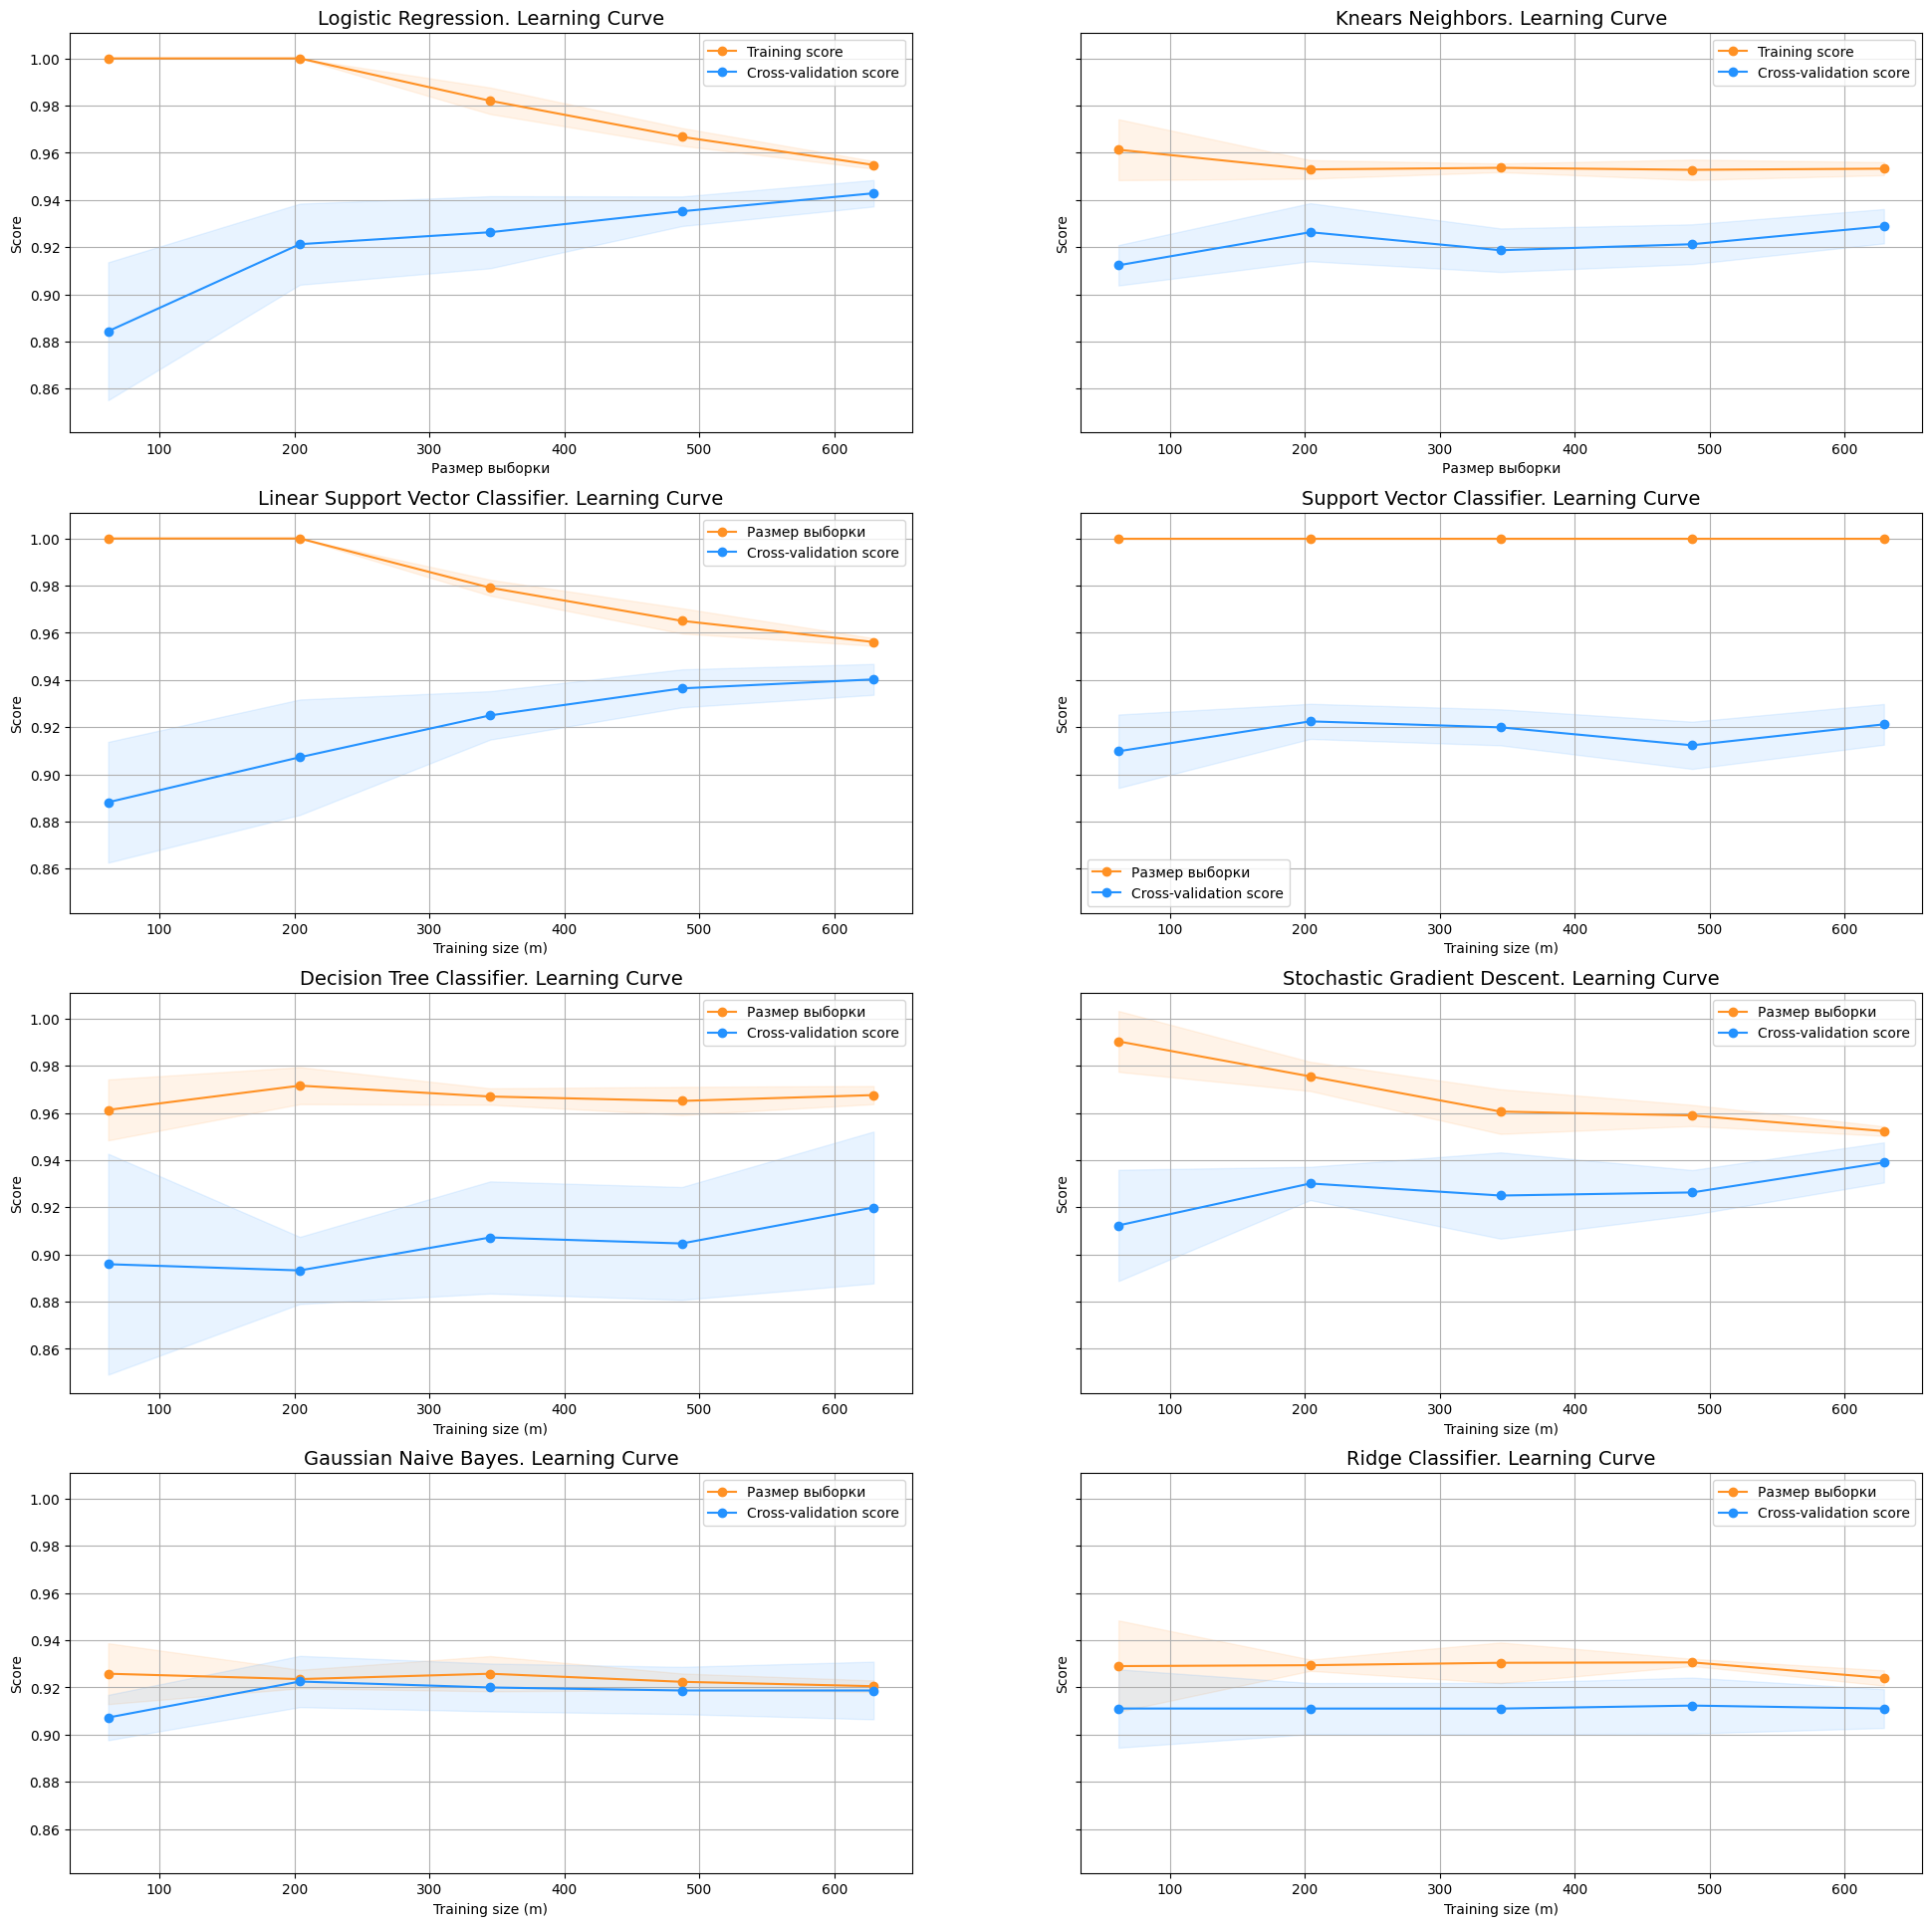

In [20]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curves(log_reg, knears_neighbors, linear_svc, svc, tree_clf, sgd_clf, gaussian_nb_clf, ridge_clf, X_train, y_train)

## Кривые обучения:
<ul>
<li>Чем больше разрыв между результатами обучения и результатами кросс-валидации, тем больше вероятность того, что модель переобучилась (большой разброс).</li>
<li> Если результаты низкие как на обучающем, так и на кросс-валидационном наборе, это указывает на то, что наша модель недообучилась (большое смещение).</li>
<li>Логистическая регрессия показала себя лучше остальных.</li>
</ul>

In [21]:
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

linear_svc_pred = cross_val_predict(linear_svc, X_train, y_train, cv=5,
                             method="decision_function")

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5,
                             method="decision_function")

gaussian_nb_pred = cross_val_predict(gaussian_nb_clf, X_train, y_train, cv=5)

ridge_pred = cross_val_predict(ridge_clf, X_train, y_train, cv=5,
                             method="decision_function")

In [25]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Linear Support Vector Classifier: ', roc_auc_score(y_train, linear_svc_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('Stochastic Gradient Descent: ', roc_auc_score(y_train, sgd_pred))
print('Gaussian Naive Bayes: ', roc_auc_score(y_train, gaussian_nb_pred))
print('Ridge Classifier: ', roc_auc_score(y_train, ridge_pred))

Logistic Regression:  0.9797470970408546
KNears Neighbors:  0.9288920318776559
Linear Support Vector Classifier:  0.9795727257462447
Support Vector Classifier:  0.9540305601839295
Decision Tree Classifier:  0.928862969995221
Stochastic Gradient Descent:  0.9754265638521848
Gaussian Naive Bayes:  0.9187462058097933
Ridge Classifier:  0.9708993683884217


Построим roc-кривую и посчитаем площадь под ней.

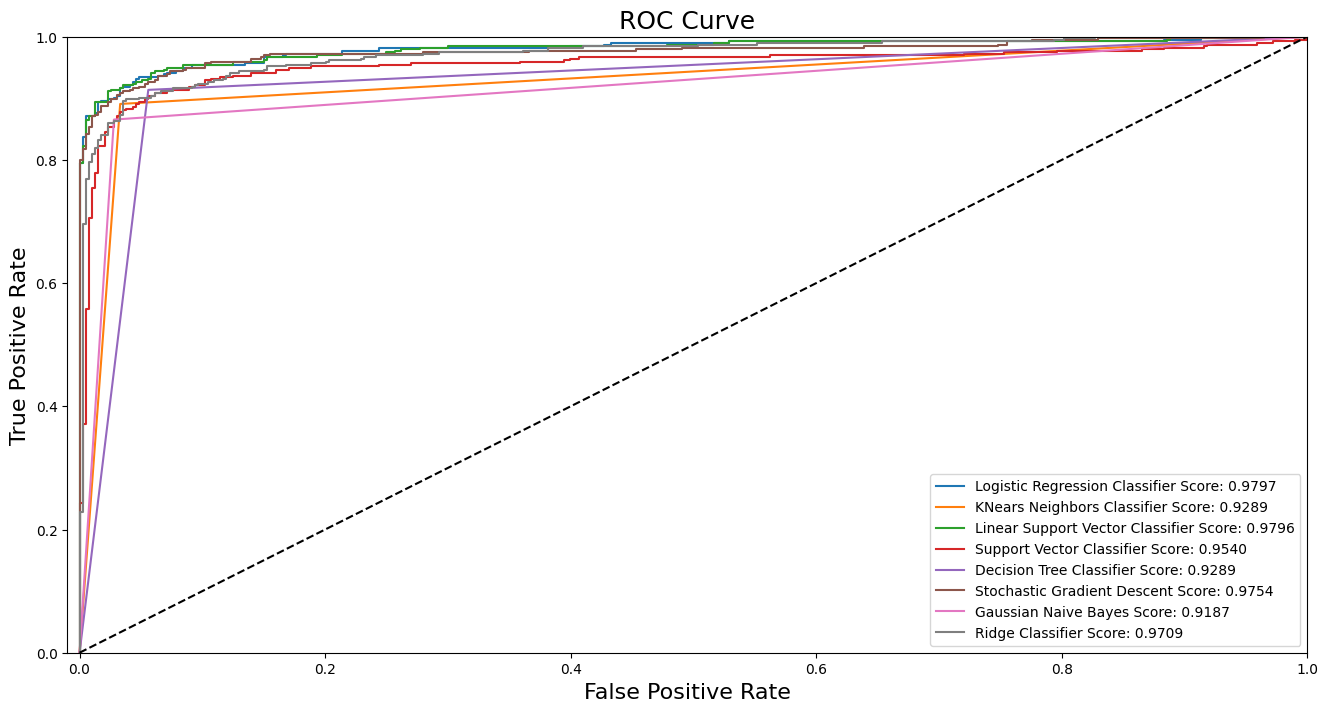

In [26]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
linear_svc_fpr, linear_svc_tpr, linear_svc_threshold = roc_curve(y_train, linear_svc_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
sgd_fpr, sgd_tpr, sgd_threshold = roc_curve(y_train, sgd_pred)
gaussian_fpr, gaussian_tpr, gaussian_threshold = roc_curve(y_train, gaussian_nb_pred)
ridge_fpr, ridge_tpr, ridge_threshold = roc_curve(y_train, ridge_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, linear_svc_fpr, linear_svc_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, sgd_fpr, sgd_tpr, gaussian_fpr, gaussian_tpr, ridge_fpr, ridge_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(linear_svc_fpr, linear_svc_tpr, label='Linear Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, linear_svc_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(sgd_fpr, sgd_tpr, label='Stochastic Gradient Descent Score: {:.4f}'.format(roc_auc_score(y_train, sgd_pred)))
    plt.plot(gaussian_fpr, gaussian_tpr, label='Gaussian Naive Bayes Score: {:.4f}'.format(roc_auc_score(y_train, gaussian_nb_pred)))
    plt.plot(ridge_fpr, ridge_tpr, label='Ridge Classifier Score: {:.4f}'.format(roc_auc_score(y_train, ridge_pred)))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, linear_svc_fpr, linear_svc_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, sgd_fpr, sgd_tpr, gaussian_fpr, gaussian_tpr, ridge_fpr, ridge_tpr)
plt.show()

### SMOTE метод (Over-Sampling):

<b>SMOTE</b> означает Synthetic Minority Over-sampling Technique.  В отличие от Random Under-Sampling, SMOTE создает новые синтетические точки для того, чтобы создать баланс классов. Это еще одна альтернатива для решения проблемы дисбаланса классов. <br><br>


<b> Принцип работы SMOTE: </b>
<ul>
<li><b>Генерация синтетических точек: </b> SMOTE выбирает расстояние между ближайшими соседями меньшего класса и между ними создает синтетические точки. </li>
<li> <b>Преимущество:  </b> Сохраняется больше информации, поскольку нам не пришлось удалять данные, в отличие от under-sampling.</li>
</ul>

### Правильное использование SMOTE
Если мы создадим синтетические точки перед кросс-валидацией, мы окажем определенное влияние на тестовое выборку. Но тестовая выборка не должна быть тронута! По этой причине мы должны создавать синтетические точки данных во время кросс-валидации, а не до нее.

Попробуем в качестве алгоритм подбора гиперпараметров случайный поиск. Он работает быстрее, чем поиск по сетке.

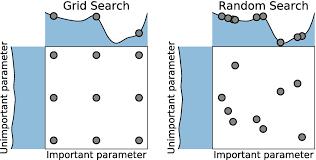

In [27]:
# Берем кусок кода из предыдущего блокнота



from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Распределение классов: 

Обучающий набор: [0.99827075 0.00172925]
Тестовый набор: [0.99827955 0.00172045]


In [28]:
# сохраним параметры наших классификаторов, на которых они показали лучших результат с GridSearchCV

#dictionary of classifiers objects which we got in the above cell via GridSearchCV
#with the tuned parameters
tuned_classifiers = {
    "Logisitic Regression": LogisticRegression(), # Логистическая регрессия
    "Support Vector Classifier": SVC(), # Метод опорных векторов
    "KNearest Classifie": KNeighborsClassifier(), # Метод ближайших соседей
    "Linear Support Vector Classifier": LinearSVC(), # Линейный метод опорных векторов
    "Decision Tree Classifier": DecisionTreeClassifier(), # Решающее дерево
    "Stochastic Gradient Descent Classifier": SGDClassifier(), # Стохастический градиентный спуск
    "Gaussian Naive Bayes": GaussianNB(), # Гауссовский наивный байес
    "Ridge Classifier": RidgeClassifier(), # Регрессия ядра хребта
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

Logisitic Regression Cross Validation Score: 93.77%
Support Vector Classifier Cross Validation Score: 92.76%
KNearest Classifie Cross Validation Score: 92.76%
Linear Support Vector Classifier Cross Validation Score: 93.77%
Decision Tree Classifier Cross Validation Score: 92.0%
Stochastic Gradient Descent Classifier Cross Validation Score: 93.65%
Gaussian Naive Bayes Cross Validation Score: 91.87%
Ridge Classifier Cross Validation Score: 90.72%


У всех данных моделей Cross Validation практически совподает, максимальная разница это 3%, у большенства раличие в 1%

In [30]:
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Machine learning Pipeline libraries
from imblearn.pipeline import Pipeline

In [29]:
# Пришлось убрать метод опорных векторов
tuned_classifiers = {
    "Logisitic Regression": LogisticRegression(), # Логистическая регрессия
    # "Support Vector Classifier": SVC(), # Метод опорных векторов
    "KNearest Classifie": KNeighborsClassifier(), # Метод ближайших соседей
    "Linear Support Vector Classifier": LinearSVC(), # Линейный метод опорных векторов
    "Decision Tree Classifier": DecisionTreeClassifier(), # Решающее дерево
    "Stochastic Gradient Descent Classifier": SGDClassifier(), # Стохастический градиентный спуск
    "Gaussian Naive Bayes": GaussianNB(), # Гауссовский наивный байес
    "Ridge Classifier": RidgeClassifier(), # Регрессия ядра хребта
}



# here we are using the imbalanced dataset
X = df.drop('Class', axis=1)
y = df['Class']



# StratifiedKFold is used for cross validation
# This cross-validation object is a variation of KFold that returns stratified folds.
# The folds are made by preserving the percentage of samples for each class.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# creating the object for Over Sampling the minority class
over = SMOTE(sampling_strategy=0.1,k_neighbors=5)

# creating the object for Under Sampling the majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# iterating thru the dictionary of tuned classifiers
for key, classifier in tuned_classifiers.items():

    # list of steps to be provided to the ML Pipeline
    steps=[('o',over),('u',under),('model',classifier)]

    # Creating a ML Pipeline
    FiPipeline=Pipeline(steps=steps)

    # Cross validating the classifiers
    scores=cross_val_score(FiPipeline,X,y,cv=sss)

    # Printing the mean accuracy score
    print(f"Classifiers: {key} Has a training score of, {round(scores.mean() * 100, 2)} % accuracy score")

Classifiers: Logisitic Regression Has a training score of, 97.65 % accuracy score
Classifiers: KNearest Classifie Has a training score of, 41.3 % accuracy score
Classifiers: Linear Support Vector Classifier Has a training score of, 99.29 % accuracy score
Classifiers: Decision Tree Classifier Has a training score of, 79.47 % accuracy score
Classifiers: Stochastic Gradient Descent Classifier Has a training score of, 78.96 % accuracy score
Classifiers: Gaussian Naive Bayes Has a training score of, 99.21 % accuracy score
Classifiers: Ridge Classifier Has a training score of, 99.4 % accuracy score


In [31]:
# Линейная регрессия

# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.01)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', log_reg)
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN_log_reg = GridSearchCV(model, {'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN_log_reg.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN_log_reg.best_estimator_)
print(SMOTE_KN_log_reg.best_score_)
print(SMOTE_KN_log_reg.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
log_reg_score = cross_val_score(SMOTE_KN_log_reg.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}% \n\n')




# Линейный метод опорных векторов

# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.01)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', linear_svc)
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN_linear_svc = GridSearchCV(model, {'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN_linear_svc.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN_linear_svc.best_estimator_)
print(SMOTE_KN_linear_svc.best_score_)
print(SMOTE_KN_linear_svc.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
linear_svc_score = cross_val_score(SMOTE_KN_linear_svc.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Linear Support Vector Classifier Cross Validation Score: {round(linear_svc_score.mean() * 100, 2)}% \n\n')


# Gaussian Naive Bayes

# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.01)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', gaussian_nb_clf)
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN_gaussian = GridSearchCV(model,{'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN_gaussian.fit(original_Xtrain, original_ytrain)

print(SMOTE_KN_gaussian.best_estimator_)
print(SMOTE_KN_gaussian.best_score_)
print(SMOTE_KN_gaussian.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
gaussian_score = cross_val_score(SMOTE_KN_gaussian.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Gaussian Naive Bayes Validation Score: {round(gaussian_score.mean() * 100, 2)}% \n\n')



# Kernel ridge regression

# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.01)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', ridge_clf)
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN_ridge = GridSearchCV(model, {'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN_ridge.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN_ridge.best_estimator_)
print(SMOTE_KN_ridge.best_score_)
print(SMOTE_KN_ridge.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
ridge_score = cross_val_score(SMOTE_KN_ridge.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Ridge classificator Validation Score: {round(ridge_score.mean() * 100, 2)}%')

Pipeline(steps=[('sampling', SMOTE(k_neighbors=7, sampling_strategy=0.01)),
                ('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification', LogisticRegression(C=1000))])
0.9739300695052184
{'sampling__k_neighbors': 7}
Logistic Regression Cross Validation Score: 96.37% 


Pipeline(steps=[('sampling', SMOTE(k_neighbors=1, sampling_strategy=0.01)),
                ('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification', LinearSVC(C=1000.0))])
0.9912310619021717
{'sampling__k_neighbors': 1}
Linear Support Vector Classifier Cross Validation Score: 98.72% 


Pipeline(steps=[('sampling', SMOTE(k_neighbors=6, sampling_strategy=0.01)),
                ('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification', GaussianNB())])
0.9901600311123196
{'sampling__k_neighbors': 6}
Gaussian Naive Bayes Validation Score: 98.98% 


Pipeline(steps=[('sampling', SMOTE(k_neighbors=4, sampling_strategy=0.0

In [32]:
labels = ['Non Fraud', 'Fraud']

print('Logistic Regression')
best_est_log_reg = SMOTE_KN_log_reg.best_estimator_
smote_prediction = best_est_log_reg.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

print('\n\n')
print('Linear Support Vector')
best_linear_svc = SMOTE_KN_linear_svc.best_estimator_
smote_prediction = best_linear_svc.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

print('\n\n')
print('Gaussian Naive Bayes')
best_est_gaussian = SMOTE_KN_gaussian.best_estimator_
smote_prediction = best_est_gaussian.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

print('\n\n')
print('Kernel ridge regression')
best_est_ridge = SMOTE_KN_ridge.best_estimator_
smote_prediction = best_est_ridge.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

Logistic Regression
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.42      0.84      0.56        98

    accuracy                           1.00     56961
   macro avg       0.71      0.92      0.78     56961
weighted avg       1.00      1.00      1.00     56961




Linear Support Vector
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.97      0.72      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961




Gaussian Naive Bayes
              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      1.00     56863
       Fraud       0.13      0.64      0.22        98

    accuracy                           0.99     56961
   macro avg       0.57      0.82      0.61     56961
weigh

In [33]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Применим SMOTE после кросс-валидации
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [35]:
# Обучим логистическую регрессию
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 10.491806268692017 сек


In [37]:
# Обучим линейный метод опорных векторов
t0 = time.time()
linear_svc_sm = grid_linear_svc.best_estimator_
linear_svc_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 4.123457193374634 сек


In [38]:
# Обучим Kernel ridge regression
t0 = time.time()
ridge_sm = ridge.best_estimator_
ridge_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 0.3685600757598877 сек


In [39]:
# Обучим Gaussian Naive Bayes
t0 = time.time()
gaussian_sm = gaussian_nb.best_estimator_
gaussian_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 0.3960397243499756 сек


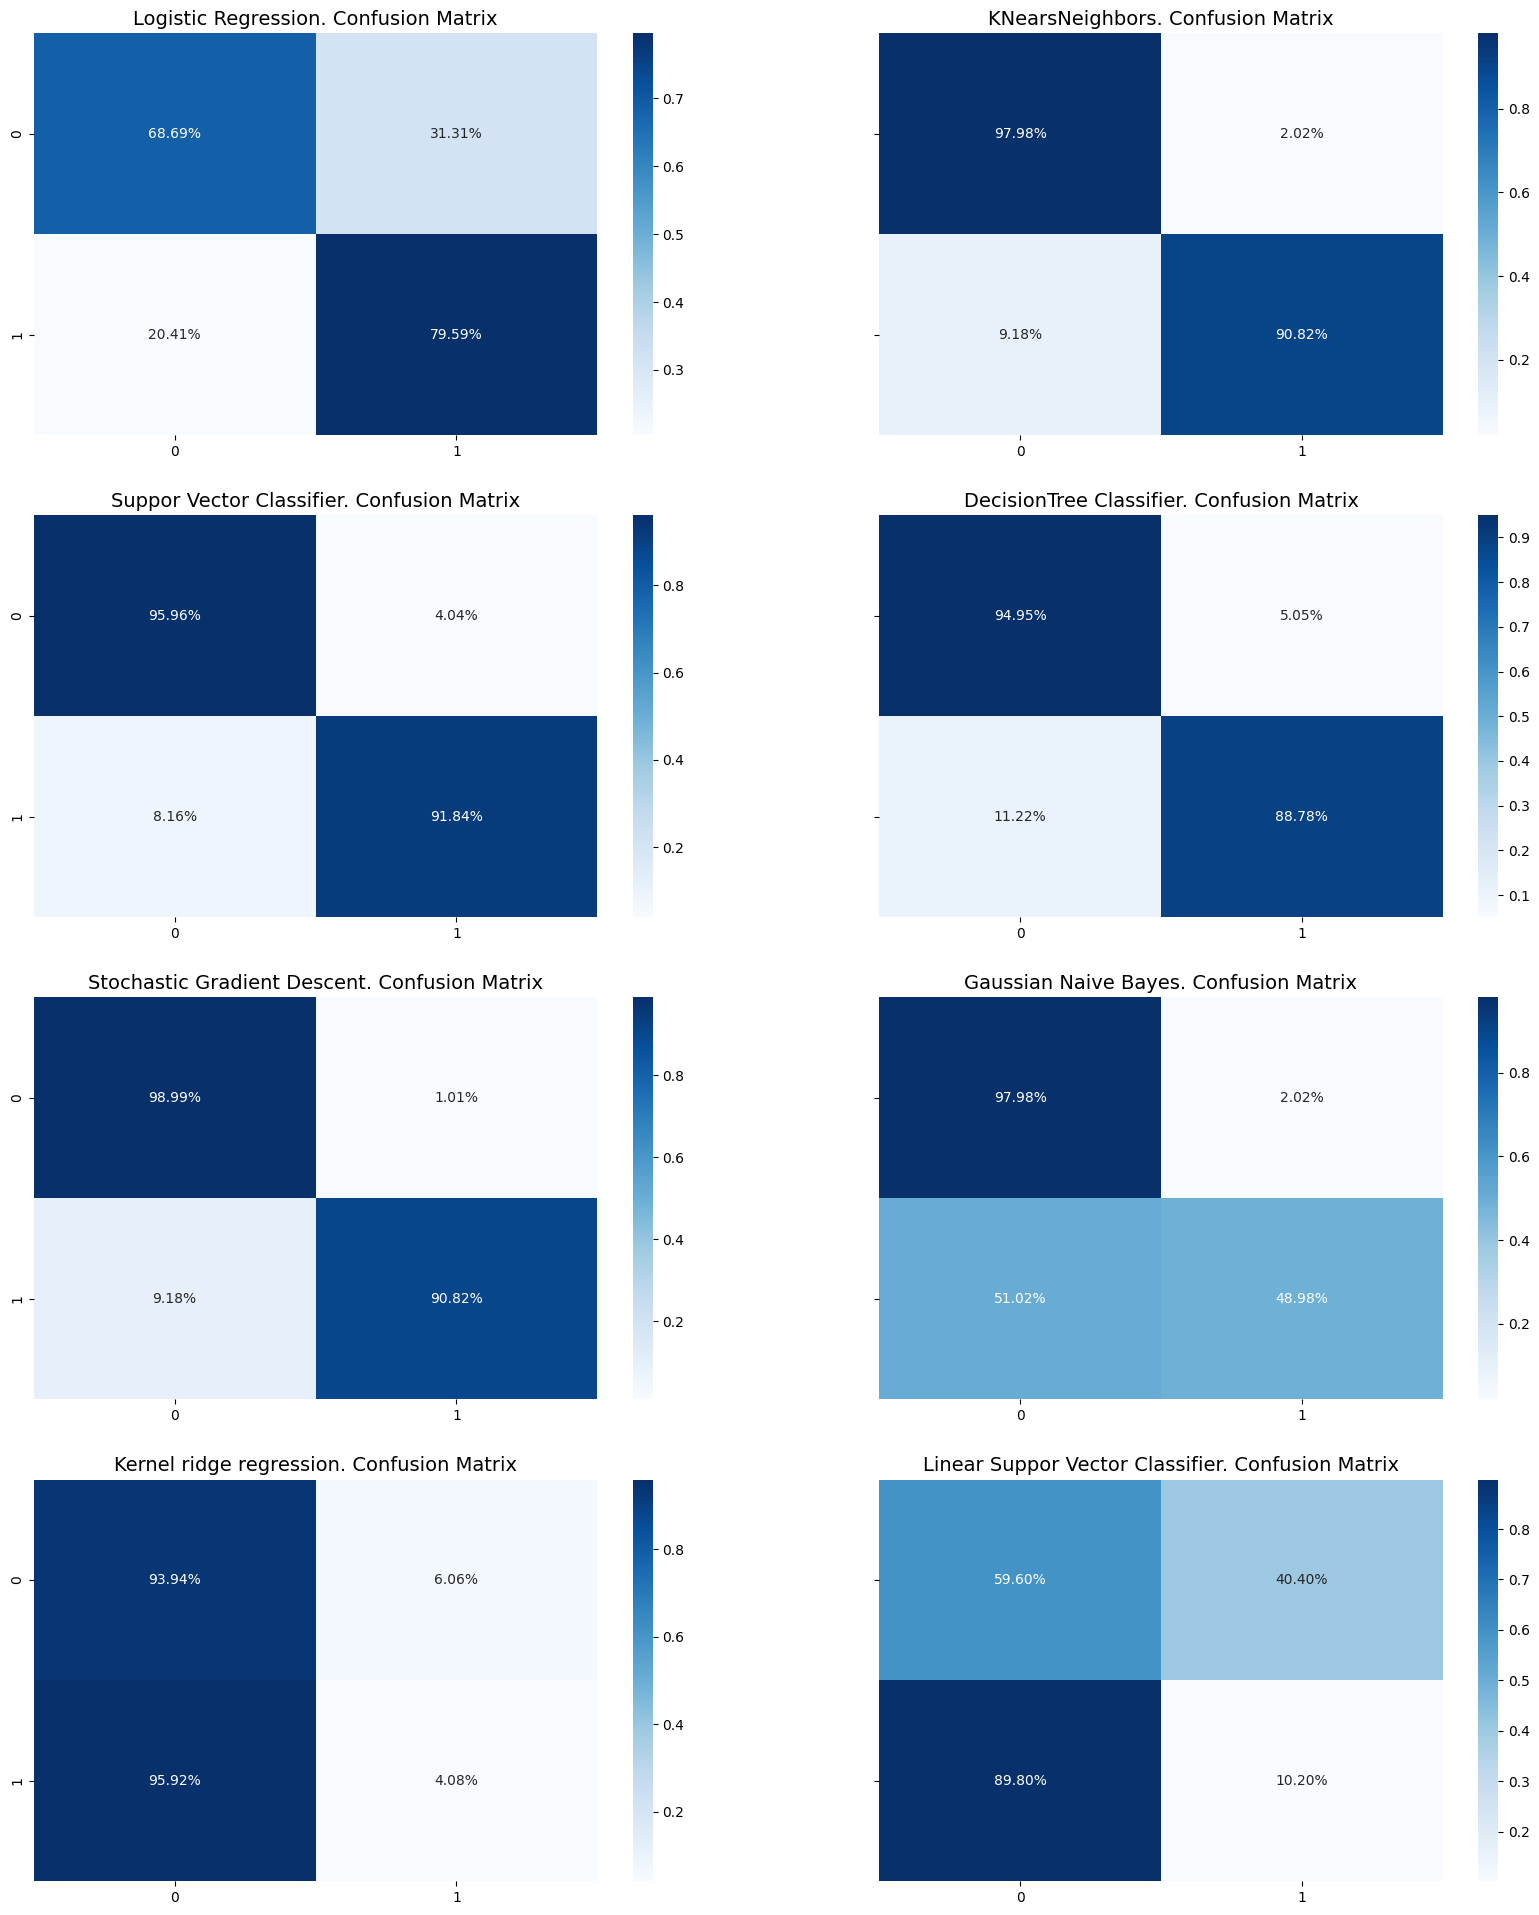

In [41]:
y_pred_log_reg = best_est_log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_linear_svc = best_linear_svc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

y_pred_sgd = sgd_clf.predict(X_test)
y_pred_gaussian = best_est_gaussian.predict(X_test)
y_pred_ridge = best_est_ridge.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg, normalize='true')
kneighbors_cf = confusion_matrix(y_test, y_pred_knear, normalize='true')
linear_svc_cf = confusion_matrix(y_test, y_pred_linear_svc, normalize='true')
svc_cf = confusion_matrix(y_test, y_pred_svc, normalize='true')
tree_cf = confusion_matrix(y_test, y_pred_tree, normalize='true')

sgd_cf = confusion_matrix(y_test, y_pred_sgd, normalize='true')
gaussia_cf = confusion_matrix(y_test, y_pred_gaussian, normalize='true')
ridge_cf = confusion_matrix(y_test, y_pred_ridge, normalize='true')

fig,  ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2,figsize=(20,24), sharey=True)
# Построим матрицы ошибок
sns.heatmap(ax=ax1, data=log_reg_cf, annot=True, fmt='.2%', cmap='Blues')
ax1.set_title("Logistic Regression. Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax2,data=kneighbors_cf, annot=True, fmt='.2%', cmap='Blues')
ax2.set_title("KNearsNeighbors. Confusion Matrix", fontsize=14)


#
sns.heatmap(ax=ax3, data=svc_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax3.set_title("Suppor Vector Classifier. Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax4, data=tree_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax4.set_title("DecisionTree Classifier. Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax5, data=sgd_cf, annot=True, fmt='.2%', cmap='Blues')
ax5.set_title("Stochastic Gradient Descent. Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax6, data=gaussia_cf, annot=True, fmt='.2%', cmap='Blues')
ax6.set_title("Gaussian Naive Bayes. Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax7, data=ridge_cf, annot=True, fmt='.2%', cmap='Blues')
ax7.set_title("Kernel ridge regression. Confusion Matrix", fontsize=14)

#
sns.heatmap(ax=ax8, data=linear_svc_cf, annot=True, fmt='.2%', cmap='Blues')
ax8.set_title("Linear Suppor Vector Classifier. Confusion Matrix", fontsize=14)


plt.show()

Выведем основные метрики моделей.

Давайте вспомним основные метрики качества классификации на примере нашей задачи:

* **Confusion matrix** : так же известна как матрица ошибок, состоит из 4 частей:

    * true positive (TP) : транзакция была мошеннической и модель предсказала ее как мошенническую
    * true negative (TN) : транзакция была нормальной и модель определила ее как нормальную
    * false positive (FP) : транзакция была нормальная, но модель среагировала на нее как на мошенническую
    * false negative (FN) : транзакция была мошенническая, но модель ее пропустила и посчитала нормальной


* **Метрики** :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP) (подходит при дисбалансе)
    * Recall : TP / (TP + FN) (подходит при дисбалансе)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall)) (подходит при дисбалансе)

* **Roc-кривая** : ROC-кривая строится путем отрисовки графика зависимости частоты истинных положительных результатов (TPR) от частоты ложных положительных результатов (FPR) при различных пороговых значениях.

In [42]:
from sklearn.metrics import classification_report



print('Logistic Regression:')
#
y_pred = best_est_log_reg.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('KNears Neighbors:')
#
y_pred = knears_neighbors.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Linear Support Vector Classifier:')
#
y_pred = best_linear_svc.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Support Vector Classifier:')
#
y_pred = svc.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Decision Tree Classifier:')
#
y_pred = tree_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Stochastic Gradient Descent:')
#
y_pred = sgd_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Gaussian Naive Bayes:')
#
y_pred = best_est_gaussian.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Kernel ridge regression:')
#
y_pred = best_est_ridge.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.42      0.84      0.56        98

    accuracy                           1.00     56961
   macro avg       0.71      0.92      0.78     56961
weighted avg       1.00      1.00      1.00     56961

KNears Neighbors:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Linear Support Vector Classifier:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.97      0.72      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
w

Поскольку мы выбрали Decision Tree Classifier в качестве основной модели, давайте сравним ее качество в случае подхода under-sampling и в случае over-sampling.

У линейного метода опорных векторов результаты получаются лучше, чем у линейной регресии.  
В целом линейные методы показывают себя лучше, чем другии модели.

In [43]:
# Логистическая регрессия с under-sampling
y_pred = tree_clf.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Логистическая регрессия с over-sampling
y_pred_sm = best_est_log_reg.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.927863
1,Oversampling (SMOTE),0.997735


In [44]:
# Логистическая регрессия с under-sampling
y_pred = tree_clf.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Линейный метод опорных векторов с over-sampling
y_pred_sm = best_linear_svc.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.927863
1,Oversampling (SMOTE),0.999491


In [45]:
# Логистическая регрессия с under-sampling
y_pred = tree_clf.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Гауссовский наивный баяс с over-sampling
y_pred_sm = best_est_gaussian.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.927863
1,Oversampling (SMOTE),0.992047


Итак, в данной задаче более оптимальным подходом оказался over-samplimg методом SMOTE.

In [46]:
# Логистическая регрессия с under-sampling
y_pred = tree_clf.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Регрессия хребта с over-sampling
y_pred_sm = best_est_ridge.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.927863
1,Oversampling (SMOTE),0.996401


<h4>Вывод:  


1.   Линейные модели показали наилучший результат для этих данных
2.   Если рассмотреть все результаты по моделем, то не всё так гладко.  
     Результат некоторых моделий разнится от методов оценки.
3. Наилучшая модель для этого датасета - это Линейная модель опорных вектров. Она схожа с Линейной регрессией, но из-за более гибких настроик результат получился более впечятляющий.




</h4>